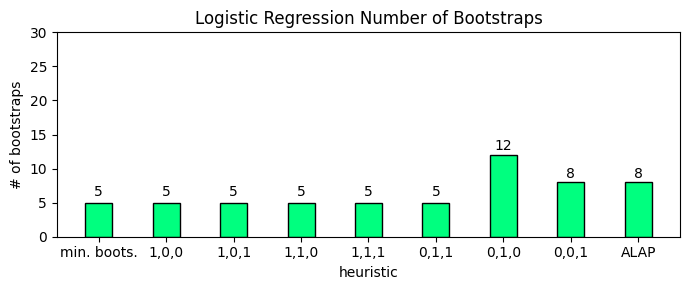

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def autolabel(rects, axis, include_decimal):
  for rect in rects:
      height = rect.get_height()
      spec = '%2.1f'
      if not include_decimal:
        spec = '%d'
      if height > 5:
          axis.text(rect.get_x() + rect.get_width()/2., 1.02*height, spec % (height), ha='center', va='bottom', fontsize=10)
      else:
          axis.text(rect.get_x() + rect.get_width()/2., 1.1*height, spec % (height), ha='center', va='bottom', fontsize=10)



# filename = 'multipliers_vs_latency_sorted'
# df = pd.read_csv("multipliers_data_geomean.csv")
# pltsize = (6, 3)
# xlabel="segments, slack, urgency weights"
# ylabel="geometric mean latency (s)"
# ylim = [0,100]

# filename = 'multipliers_vs_bootstraps'
# df = pd.read_csv("multipliers_bootstraps_geomean.csv")
# pltsize = (6, 3)
# xlabel="segments, slack, urgency weights"
# ylabel="geometric mean # of bootstraps"
# ylim = [0,30]

# filename = 'heuristic_vs_latency'     
# df = pd.read_csv("heuristic_type_data_geomean.csv")
# pltsize = (4, 3)
# xlabel="heuristic type"
# ylabel="geometric mean latency (s)"
# ylim = [0,100]

# filename = 'heuristic_vs_bootstraps'     
# df = pd.read_csv("heuristic_bootstraps_geomean.csv")
# pltsize = (4, 3)
# xlabel="heuristic type"
# ylabel="geometric mean # of bootstraps"
# ylim = [0,30]

# filename = 'normalized_lr_vs_latency'     
# df = pd.read_csv("normalized_benchmark_latencies.csv")
# pltsize = (7, 3)
# title="Logistic Regression Execution Time"
# xlabel="heuristic"
# ylabel="geometric mean latency (s)"
# ylim = [0,70]
# include_decimal = True

filename = 'normalized_lr_vs_bootstraps'     
df = pd.read_csv("normalized_benchmark_bootstraps.csv")
pltsize = (7, 3)
title="Logistic Regression Number of Bootstraps"
xlabel="heuristic"
ylabel="# of bootstraps"
ylim = [0,30]
include_decimal = False

# filename = 'normalized_random_vs_latency'     
# df = pd.read_csv("normalized_random_latencies.csv")
# pltsize = (7, 3)
# title="Synthetic FHE Execution Time"
# xlabel="heuristic"
# ylabel="geometric mean latency (s)"
# ylim = [0,100]
# include_decimal = True

# filename = 'normalized_random_vs_bootstraps'     
# df = pd.read_csv("normalized_random_bootstraps.csv")
# pltsize = (7, 3)
# title="Synthetic FHE Number of Bootstraps"
# xlabel="heuristic"
# ylabel="# of bootstraps"
# ylim = [0,30]
# include_decimal = True


pdf = PdfPages(filename + '.pdf')

avg_times = df["time"]

left = [i for i in range(len(avg_times))]

labels = df["multipliers"]
fig = plt.figure(figsize=pltsize)
ax = plt.gca()
ax.set_ylim(ylim)
rects = plt.bar(left, avg_times, color='springgreen', edgecolor='black', tick_label=labels, width=0.4)
autolabel(rects, ax, include_decimal)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.tight_layout()
plt.savefig(filename + ".png",dpi=300, bbox_inches="tight", pad_inches=0.03)
pdf.savefig()
pdf.close()